### Импорт библиотек

In [52]:
import os
import sqlite3
import pandas as pd

In [53]:
project_dir_path = os.environ["NIR_1_sem_magistracy"]

In [54]:
import sys

lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields, metrics, display_dfs
from nn_train.neural_network import NeuralNetwork

### Сбор всех данных в единый df ('Aleksashina_Керов_Андрей.db' + 'other.db')

In [55]:
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)

In [56]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'train.db', 'clear_emotions.db', 'other.db'])

In [57]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


### Изменение index'а в df

In [58]:
tools.make_valid_df(df, fields)

In [59]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


### Сбор всех clear эмоций в единый df_clear ('clear_emotions.db')

In [60]:
name_db = 'clear_emotions'
db_path = os.path.join(db_dir_path, f'{name_db}.db')
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
tools.make_valid_df(df_clear, fields)
df_clear = df_clear[fields]
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


### Загрузка 7-ми лучших моделей

In [61]:
dir_model = 'saved_models'
path_to_saved_models = os.path.join(project_dir_path, dir_model)
v = 5
layer = 'third'
all_models = ['9.6.8', '7.10.9', '7.9.8', '9.6.7', '8.9.8', '8.10.8', '8.10.9'] # seven_models
csv_test_file = 'Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv'

load_params = {'path_to_saved_models': path_to_saved_models,
               'df': df,
               'models_list': all_models,
               'layer': layer,
               'v': v,
               'sort': False,
               'csv_test_file': csv_test_file}
all_models = tools.load_models(**load_params)
all_models

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWit

[['9.6.8_5',
  '9.6.8',
 ['7.10.9_5',
  '7.10.9',
 ['7.9.8_5',
  '7.9.8',
 ['9.6.7_5',
  '9.6.7',
 ['8.9.8_5',
  '8.9.8',
 ['8.10.8_5',
  '8.10.8',
 ['8.10.9_5',
  '8.10.9',

### Загрузка .joblib модели из NIR_3 // Может быть некликабельно, если не склонирован NIR_3 репозиторий

In [62]:
from joblib import load

dir_joblib_path = os.path.join(os.environ["NIR_3_sem_magistracy"], 'Models')
model_path = '2-_7/2-_7 best_model Random Forest.joblib'
model_full_path = os.path.join(dir_joblib_path, model_path)
model_full_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_3_sem_magistracy/Models/2-_7/2-_7 best_model Random Forest.joblib'

In [63]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], load(model_full_path), csv_test_file)
all_models = all_models + [['2-_7', '2-_7.joblib', nn]]
all_models

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['9.6.8_5',
  '9.6.8',
 ['7.10.9_5',
  '7.10.9',
 ['7.9.8_5',
  '7.9.8',
 ['9.6.7_5',
  '9.6.7',
 ['8.9.8_5',
  '8.9.8',
 ['8.10.8_5',
  '8.10.8',
 ['8.10.9_5',
  '8.10.9',
 ['2-_7',
  '2-_7.joblib',

### Тестовыми данными для сбора метрик по умолчанию является весь df

In [64]:
nn_tuple = all_models[0]
test = nn_tuple[2].get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


### Вычисление метрики для одной модели

In [65]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [66]:
entry_dict = {'model': nn_tuple[0], 'layer': layer, 'N': nn_tuple[1]}
entry_dict.update({metric: nn_tuple[2].model_metric(test, metric) for metric in metrics})
df_metrics = df_metrics.append(entry_dict, ignore_index = True)
df_metrics

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_17188/2478549130.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


,model,layer,N,mean,norm,stat
0,9.6.8_5,third,9.6.8,0.04861,0.13473,0.579636


### Вычисление метрик для лучших моделей

In [67]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics = tools.create_df_metrics(all_models, test, df_metrics, layer=layer)
df_metrics.sort_values('mean')

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:251: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:251: FutureWarning: The frame.append method is dep

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/iv

,model,layer,N,mean,norm,stat
7,2-_7,third,2-_7.joblib,0.019696,0.055555,0.671118
1,7.10.9_5,third,7.10.9,0.047961,0.133694,0.56589
0,9.6.8_5,third,9.6.8,0.04861,0.13473,0.579636
3,9.6.7_5,third,9.6.7,0.048896,0.135041,0.548675
6,8.10.9_5,third,8.10.9,0.049014,0.136154,0.581751
2,7.9.8_5,third,7.9.8,0.049126,0.136223,0.578327
4,8.9.8_5,third,8.9.8,0.04913,0.13599,0.549932
5,8.10.8_5,third,8.10.8,0.049758,0.137691,0.566595


### Метрики для всех 3-х слойных моделей, которые не были отсеяны и дошли до v=5 итерации. Вычислены заранее

In [68]:
v

5

In [69]:
layer

'third'

In [70]:
name_db = 'df_metrics'
db_path = os.path.join(project_dir_path, f'model_metrics/{layer}/_{v}/{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_5/df_metrics_5.db'

In [71]:
connection = sqlite3.connect(db_path)
df_metrics_5 = pd.read_sql(f'select * from {name_db}', con=connection)
tools.apply_float(df_metrics_5, df_metrics_5.columns[3:])
df_metrics_5

,model,layer,N,mean,norm,stat
0,6.4.9_5,third,6.4.9,0.049450,0.137629,0.555500
1,6.5.6_5,third,6.5.6,0.051510,0.141843,0.540040
2,6.5.7_5,third,6.5.7,0.049111,0.135486,0.557289
3,6.6.7_5,third,6.6.7,0.050849,0.140907,0.539387
4,6.7.9_5,third,6.7.9,0.049933,0.138603,0.530336
5,6.8.3_5,third,6.8.3,0.051051,0.142206,0.531685
6,6.8.6_5,third,6.8.6,0.051246,0.141795,0.555283
7,6.8.7_5,third,6.8.7,0.052489,0.143851,0.499005
8,6.8.8_5,third,6.8.8,0.050469,0.139653,0.528624
9,6.8.9_5,third,6.8.9,0.050292,0.139357,0.525771


### Вычисление clear-метрики для лучших моделей (2-мя способами // fitting_algorithm: 'another' vs 'master')

#### another_fitting_algorithm // Новый вариант графика

In [72]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:149: FutureWarning: The frame.append method 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:149: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)


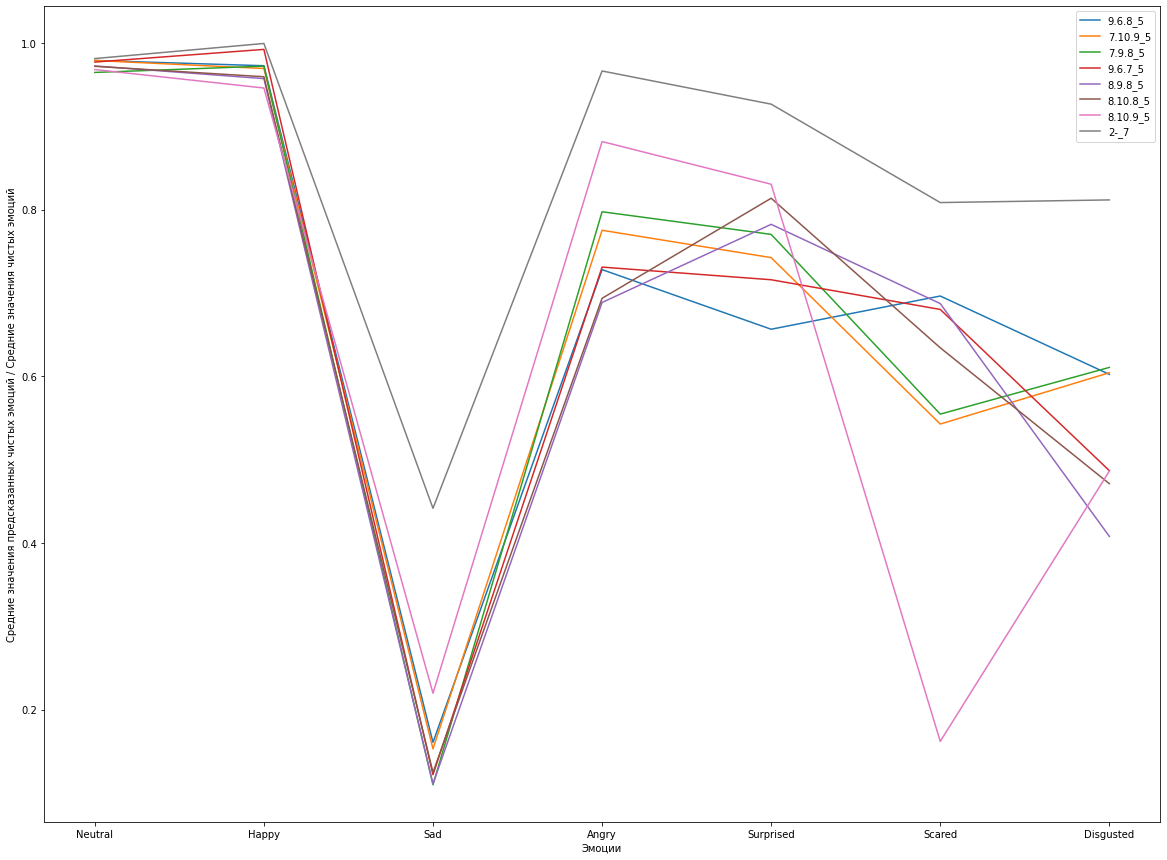

In [73]:
kwargs = { # 'fitting_algorithm': 'another'
    'models': all_models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [74]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,9.6.8_5,0.978957,0.972636,0.160663,0.727973,0.656422,0.696296,0.602264,0.68503
1,7.10.9_5,0.978962,0.969324,0.152829,0.775196,0.74237,0.542658,0.604257,0.680799
2,7.9.8_5,0.964601,0.972142,0.109812,0.797408,0.770251,0.554589,0.610625,0.682775
3,9.6.7_5,0.977057,0.992254,0.121903,0.731005,0.715813,0.680193,0.486725,0.672136
4,8.9.8_5,0.972358,0.957169,0.110917,0.68854,0.782329,0.68719,0.407857,0.658052
5,8.10.8_5,0.971953,0.959429,0.12452,0.693539,0.813634,0.634177,0.471098,0.666907
6,8.10.9_5,0.968067,0.945906,0.219619,0.881644,0.830436,0.161832,0.486166,0.641953
7,2-_7,0.981235,0.999369,0.441547,0.966342,0.926542,0.808445,0.81162,0.847872


#### master // Старый вариант графика

In [75]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:162: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:162: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:162: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:162: FutureWarning: The frame.append method 

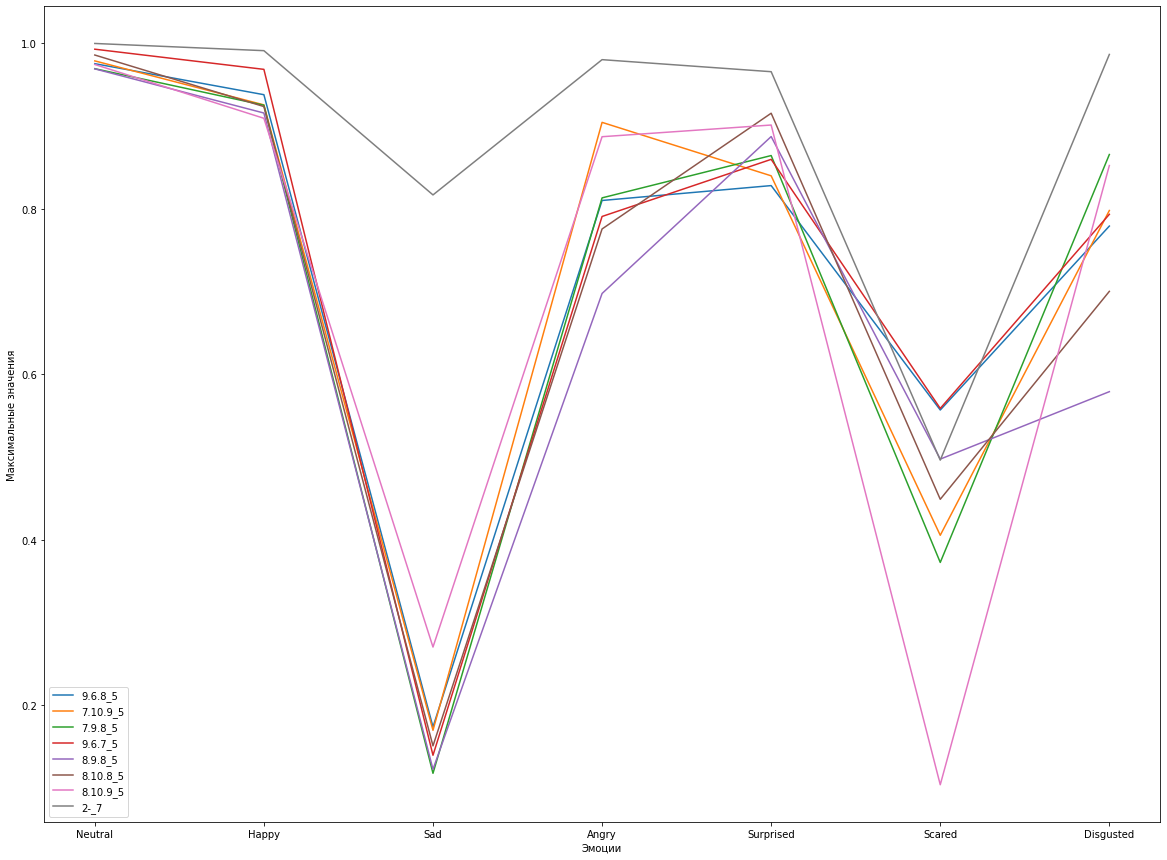

In [76]:
kwargs = {
    'models': all_models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'fitting_algorithm': 'master',
    'df_metrics': df_metrics
}

df_clear_metrics = tools.plot_emotions(**kwargs)

### clear-метрики для всех 3-х слойных моделей, которые не были отсеяны и дошли до v=5 итерации. Вычислены заранее

In [77]:
name_db = 'df_clear_metrics'
db_path = os.path.join(project_dir_path, f'model_metrics/{layer}/_{v}/{name_db}_{v}.db')
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/model_metrics/third/_5/df_clear_metrics_5.db'

In [78]:
connection = sqlite3.connect(db_path)
df_clear_metrics_5 = pd.read_sql(f'select * from {name_db}', con=connection)
tools.apply_float(df_clear_metrics_5, df_clear_metrics_5.columns[1:])
df_clear_metrics_5

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,6.4.9_5,0.971641,1.001391,1.148668e-01,6.766652e-01,7.112280e-01,7.357726e-01,5.505025e-01,0.680295
1,6.5.6_5,0.976315,0.959555,1.316238e-01,5.656129e-01,7.630815e-01,5.599845e-02,4.310857e-01,0.554753
2,6.5.7_5,0.978512,0.959656,1.099767e-01,7.170887e-01,8.153843e-01,1.054607e-01,4.271316e-01,0.587601
3,6.6.7_5,0.978982,0.972084,1.104588e-01,6.678976e-01,7.534349e-01,4.576758e-01,4.293552e-01,0.624270
4,6.7.9_5,0.968839,0.961071,2.034687e-01,6.776241e-01,7.028700e-01,4.904689e-01,4.768429e-01,0.640169
5,6.8.3_5,0.963350,1.006888,1.400177e-01,6.657295e-01,6.469059e-01,1.589388e-02,5.240916e-01,0.566125
6,6.8.6_5,0.963073,0.947957,1.315028e-01,7.219894e-01,8.064918e-01,3.706352e-02,5.083128e-01,0.588056
7,6.8.7_5,0.974944,0.953973,1.316630e-01,5.700569e-01,7.688152e-01,4.736902e-02,3.423174e-01,0.541306
8,6.8.8_5,0.971617,0.970012,1.224537e-01,6.837453e-01,7.791175e-01,7.168323e-02,3.546422e-01,0.564753
9,6.8.9_5,0.971756,0.967332,1.073510e-01,5.888085e-01,7.394925e-01,4.574802e-01,4.217090e-01,0.607704


### Демонстрация работы отдельных моделей

### Модель 9.6.8

In [79]:
nn_tuple = all_models[0]
nn_tuple

['9.6.8_5', '9.6.8', <nn_train.neural_network.NeuralNetwork at 0x7f7d8ad23be0>]

In [80]:
nn = nn_tuple[2]

In [81]:
nn._csv_test_file

'Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv'

In [82]:
nn.add_to_index

'_Aleksashina_1'

In [83]:
video_time_tuple_list = [('00:00:00.000', '00:00:00.100'),
                         ('00:00:16.000', '00:00:17.000'),
                         ('00:00:21.000', '00:00:23.000'),
                         ('00:00:36.000', '00:00:37.000'),
                         ('00:00:42.000', '00:00:42.500'),
                         ('00:00:42.500', '00:00:43.000'),
                         ('00:00:47.000', '00:00:48.000'),
                         ('00:01:06.000', '00:01:07.000'),
                         ('00:01:25.000', '00:01:26.000'),
                         ('00:01:38.000', '00:01:39.000')]

In [84]:
# Здесь на video time 00:00:36.000, 00:00:37.000 - VA больше всего похож на чистую Neutral 
# (как и предсказывает модель), однако в исходных данных наложение 2-х эмоций: Happy и Angry

# Video time 00:00:42.000, 00:00:42.500 - из Angry и Happy в слабый Happy
# Video time 00:00:42.500, 00:00:43.000 - из слабого Happy в средний Happy

# Video time 00:01:06.000, 00:01:07.000 - слабый Happy, Angry который чувствуется моделью как Neutral

# Video time 00:01:25.000, 00:01:26.000 - сильный Happy

nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.974296 
 0.000173 
 0.012535 
 0.015165 
 0.004684 
 0.000007 
 0.000047 
 
 
 00:00:00.100_Aleksashina_1 
 0.974360 
 0.000241 
 0.012156 
 0.015030 
 0.005282 
 0.000006 
 0.000044 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.044569 
 0.932486 
 0.000059 
 0.000261 
 0.000002 
 9.925955e-07 
 1.387017e-16 
 
 
 00:00:16.100_Aleksashina_1 
 0.044839 
 0.932394 
 0.000060 
 0.000266 
 0.000002 
 9.898994e-07 
 1.417025e-16 
 
 
 00:00:16.200_Aleksashina_1 
 0.045139 
 0.932229 
 0.000060 
 0.000271 
 0.000002 
 9.885861e-07 
 1.454674e-16 
 
 
 00:00:16.300_Aleksashina_1 
 0.045396 
 0.932168 
 0.000060 
 0.000275 
 0.000002 
 9.854027e-07 
 1.482788e-16 
 
 
 00:00:16.400_Aleksashina_1 
 0.045650 
 0.932126 
 0.000060 
 0.000280 
 0.000002 
 9.818082e-07 
 1.509895e-16 
 
 
 00:00:16.500_Aleksashina_1 
 0.045911 
 0.932066 
 0.000061 
 0.000285 
 0.000002 
 9.785869e-07 
 1.539229e-16 
 
 
 00:00:16.600_Aleksashina_1 
 0.046175 
 0.932016 
 0.000061 
 0.00029

### Модель 7.10.9

In [85]:
nn_tuple = all_models[1]
nn_tuple

['7.10.9_5',
 '7.10.9',

In [86]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.968822 
 0.000209 
 0.008294 
 0.016873 
 0.007969 
 0.000042 
 0.000054 
 
 
 00:00:00.100_Aleksashina_1 
 0.968311 
 0.000300 
 0.007966 
 0.015105 
 0.009123 
 0.000042 
 0.000054 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.080326 
 0.921850 
 4.937091e-09 
 1.279755e-10 
 7.057604e-11 
 5.508982e-28 
 4.360835e-12 
 
 
 00:00:16.100_Aleksashina_1 
 0.080384 
 0.921858 
 4.968709e-09 
 1.297785e-10 
 7.060848e-11 
 5.490436e-28 
 4.389994e-12 
 
 
 00:00:16.200_Aleksashina_1 
 0.080497 
 0.921781 
 5.017345e-09 
 1.320359e-10 
 7.103426e-11 
 5.554224e-28 
 4.440081e-12 
 
 
 00:00:16.300_Aleksashina_1 
 0.080532 
 0.921823 
 5.042231e-09 
 1.336929e-10 
 7.091081e-11 
 5.503353e-28 
 4.461014e-12 
 
 
 00:00:16.400_Aleksashina_1 
 0.080553 
 0.921890 
 5.062989e-09 
 1.352756e-10 
 7.067855e-11 
 5.429970e-28 
 4.476655e-12 
 
 
 00:00:16.500_Aleksashina_1 
 0.080587 
 0.921935 
 5.088004e-09 
 1.369811e-10 
 7.054602e-11 
 5.378042e-28 
 4.497538e-12 
 


### Модель 7.9.8

In [87]:
nn_tuple = all_models[2]
nn_tuple

['7.9.8_5', '7.9.8', <nn_train.neural_network.NeuralNetwork at 0x7f7d8bf3f5b0>]

In [88]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.959324 
 0.000060 
 0.017483 
 0.021912 
 0.011942 
 0.000837 
 0.000921 
 
 
 00:00:00.100_Aleksashina_1 
 0.959943 
 0.000068 
 0.017189 
 0.021161 
 0.011859 
 0.000852 
 0.000886 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.032990 
 0.921565 
 1.586804e-10 
 1.477288e-14 
 3.445126e-17 
 0.001897 
 4.702046e-09 
 
 
 00:00:16.100_Aleksashina_1 
 0.033067 
 0.921679 
 1.579901e-10 
 1.472767e-14 
 3.417755e-17 
 0.001863 
 4.689722e-09 
 
 
 00:00:16.200_Aleksashina_1 
 0.033190 
 0.921685 
 1.580621e-10 
 1.478522e-14 
 3.421720e-17 
 0.001833 
 4.691224e-09 
 
 
 00:00:16.300_Aleksashina_1 
 0.033248 
 0.921839 
 1.570865e-10 
 1.470022e-14 
 3.382759e-17 
 0.001799 
 4.673648e-09 
 
 
 00:00:16.400_Aleksashina_1 
 0.033294 
 0.922024 
 1.558968e-10 
 1.458663e-14 
 3.335336e-17 
 0.001765 
 4.652125e-09 
 
 
 00:00:16.500_Aleksashina_1 
 0.033351 
 0.922180 
 1.549091e-10 
 1.449983e-14 
 3.296365e-17 
 0.001733 
 4.634236e-09 
 
 
 00:00:16.600_Aleksash

### Модель 9.6.7

In [89]:
nn_tuple = all_models[3]
nn_tuple

['9.6.7_5', '9.6.7', <nn_train.neural_network.NeuralNetwork at 0x7f7d880545e0>]

In [90]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.966281 
 0.004593 
 0.008752 
 0.028801 
 0.004751 
 8.187541e-07 
 0.000202 
 
 
 00:00:00.100_Aleksashina_1 
 0.966817 
 0.004701 
 0.008713 
 0.026451 
 0.006086 
 9.034452e-07 
 0.000200 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.020798 
 0.965655 
 2.769626e-09 
 6.562104e-08 
 1.603984e-07 
 1.468145e-21 
 1.064510e-12 
 
 
 00:00:16.100_Aleksashina_1 
 0.020907 
 0.965669 
 2.767054e-09 
 6.594211e-08 
 1.589850e-07 
 1.440600e-21 
 1.055622e-12 
 
 
 00:00:16.200_Aleksashina_1 
 0.021059 
 0.965615 
 2.774765e-09 
 6.646462e-08 
 1.581136e-07 
 1.426856e-21 
 1.051970e-12 
 
 
 00:00:16.300_Aleksashina_1 
 0.021150 
 0.965656 
 2.768158e-09 
 6.670452e-08 
 1.565355e-07 
 1.395346e-21 
 1.041304e-12 
 
 
 00:00:16.400_Aleksashina_1 
 0.021232 
 0.965717 
 2.758660e-09 
 6.689424e-08 
 1.548078e-07 
 1.360596e-21 
 1.029196e-12 
 
 
 00:00:16.500_Aleksashina_1 
 0.021324 
 0.965760 
 2.751817e-09 
 6.713402e-08 
 1.532373e-07 
 1.329996e-21 
 1.018553

### Модель 8.9.8

In [91]:
nn_tuple = all_models[4]
nn_tuple

['8.9.8_5', '8.9.8', <nn_train.neural_network.NeuralNetwork at 0x7f7d8b0acbb0>]

In [92]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.962951 
 0.008135 
 0.013659 
 0.025012 
 0.011903 
 0.000008 
 0.000003 
 
 
 00:00:00.100_Aleksashina_1 
 0.963572 
 0.008028 
 0.013324 
 0.024422 
 0.011977 
 0.000008 
 0.000003 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.041395 
 0.912848 
 5.504504e-07 
 7.600186e-07 
 1.024842e-18 
 1.436980e-18 
 2.625803e-27 
 
 
 00:00:16.100_Aleksashina_1 
 0.041420 
 0.912934 
 5.511511e-07 
 7.649597e-07 
 1.013911e-18 
 1.413536e-18 
 2.630074e-27 
 
 
 00:00:16.200_Aleksashina_1 
 0.041487 
 0.912923 
 5.532181e-07 
 7.715036e-07 
 1.013834e-18 
 1.403676e-18 
 2.663453e-27 
 
 
 00:00:16.300_Aleksashina_1 
 0.041495 
 0.913045 
 5.533669e-07 
 7.758088e-07 
 9.989804e-19 
 1.375991e-18 
 2.656148e-27 
 
 
 00:00:16.400_Aleksashina_1 
 0.041492 
 0.913195 
 5.531452e-07 
 7.797705e-07 
 9.812630e-19 
 1.344973e-18 
 2.640841e-27 
 
 
 00:00:16.500_Aleksashina_1 
 0.041499 
 0.913320 
 5.532677e-07 
 7.841352e-07 
 9.665254e-19 
 1.317918e-18 
 2.632945e-27 
 


### Модель 8.10.8

In [93]:
nn_tuple = all_models[5]
nn_tuple

['8.10.8_5',
 '8.10.8',

In [94]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.963367 
 0.000069 
 0.010101 
 0.012421 
 0.010183 
 0.00129 
 0.000822 
 
 
 00:00:00.100_Aleksashina_1 
 0.963715 
 0.000086 
 0.009485 
 0.012213 
 0.011229 
 0.00122 
 0.000751 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.042916 
 0.919313 
 0.00002 
 0.000178 
 2.713996e-20 
 2.201494e-09 
 2.013708e-15 
 
 
 00:00:16.100_Aleksashina_1 
 0.043186 
 0.919322 
 0.00002 
 0.000179 
 2.637206e-20 
 2.156271e-09 
 1.998007e-15 
 
 
 00:00:16.200_Aleksashina_1 
 0.043478 
 0.919232 
 0.00002 
 0.000180 
 2.594588e-20 
 2.119572e-09 
 1.995539e-15 
 
 
 00:00:16.300_Aleksashina_1 
 0.043739 
 0.919280 
 0.00002 
 0.000181 
 2.510007e-20 
 2.073816e-09 
 1.975106e-15 
 
 
 00:00:16.400_Aleksashina_1 
 0.043999 
 0.919355 
 0.00002 
 0.000182 
 2.418745e-20 
 2.026379e-09 
 1.951038e-15 
 
 
 00:00:16.500_Aleksashina_1 
 0.044265 
 0.919405 
 0.00002 
 0.000182 
 2.338504e-20 
 1.982030e-09 
 1.930560e-15 
 
 
 00:00:16.600_Aleksashina_1 
 0.044535 
 0.919473 
 0.

### Модель 8.10.9

In [95]:
nn_tuple = all_models[6]
nn_tuple

['8.10.9_5',
 '8.10.9',

In [96]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.956346 
 0.001023 
 0.011081 
 0.02733 
 0.008889 
 0.000209 
 0.000024 
 
 
 00:00:00.100_Aleksashina_1 
 0.957217 
 0.001294 
 0.010065 
 0.02499 
 0.010216 
 0.000260 
 0.000026 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.033451 
 0.905908 
 5.632968e-25 
 2.462652e-27 
 2.016308e-10 
 2.748079e-12 
 0.000071 
 
 
 00:00:16.100_Aleksashina_1 
 0.033641 
 0.905958 
 5.702238e-25 
 2.514684e-27 
 2.006540e-10 
 2.742706e-12 
 0.000070 
 
 
 00:00:16.200_Aleksashina_1 
 0.033856 
 0.905913 
 5.842141e-25 
 2.598055e-27 
 2.007344e-10 
 2.752223e-12 
 0.000069 
 
 
 00:00:16.300_Aleksashina_1 
 0.034035 
 0.906000 
 5.884638e-25 
 2.639754e-27 
 1.993627e-10 
 2.741033e-12 
 0.000068 
 
 
 00:00:16.400_Aleksashina_1 
 0.034211 
 0.906116 
 5.908729e-25 
 2.674224e-27 
 1.976962e-10 
 2.725689e-12 
 0.000067 
 
 
 00:00:16.500_Aleksashina_1 
 0.034394 
 0.906206 
 5.950735e-25 
 2.716949e-27 
 1.963108e-10 
 2.714209e-12 
 0.000066 
 
 
 00:00:16.600_Aleksashin

### Модель .joblib из NIR_3 // Может быть некликабельно, если не склонирован NIR_3 репозиторий

In [97]:
nn_tuple = all_models[7]
nn_tuple

['2-_7',
 '2-_7.joblib',

In [98]:
nn = nn_tuple[2]
nn.test_model(video_time_tuple_list)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


00:00:00.000, 00:00:00.100 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 -0.024352 
 0.255187 
 
 
 00:00:00.100_Aleksashina_1 
 -0.022284 
 0.260074 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.973121 
 0.019527 
 0.000404 
 0.043879 
 0.004099 
 0.000322 
 0.001946 
 
 
 00:00:00.100_Aleksashina_1 
 0.974289 
 0.020129 
 0.000382 
 0.042413 
 0.004014 
 0.000298 
 0.001820 
 
 
 00:00:00.000, 00:00:00.100 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:00.000_Aleksashina_1 
 0.969717 
 0.012954 
 0.005019 
 0.034326 
 0.010146 
 0.000338 
 0.002696 
 
 
 00:00:00.100_Aleksashina_1 
 0.982828 
 0.000306 
 0.018718 
 0.016153 
 0.002718 
 0.000348 
 0.001237 
 
 
 00:00:16.000, 00:00:17.000 | VA (original data) 
 
 
 
 Valence 
 Arousal 
 
 
 Index_ 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.982274 
 0.763761 
 
 
 00:00:16.100_Aleksashina_1 
 0.982497 
 0.761543 
 
 
 00:00:16.200_Aleksashina_1 
 0.982457 
 0.759395 
 
 
 00:00:16.300_Aleksashina_1 
 0.982780 
 0.757186 
 
 
 00:00:16.400_Aleksashina_1 
 0.983181 
 0.754926 
 
 
 00:00:16.500_Aleksashina_1 
 0.983513 
 0.752694 
 
 
 00:00:16.600_Aleksashina_1 
 0.983897 
 0.750396 
 
 
 00:00:16.700_Aleksashina_1 
 0.983741 
 0.748033 
 
 
 00:00:16.800_Aleksashina_1 
 0.982967 
 0.745634 
 
 
 00:00:16.900_Aleksashina_1 
 0.982504 
 0.743361 
 
 
 00:00:17.000_Aleksashina_1 
 0.982369 
 0.741136 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (original data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007980 
 0.984054 
 0.000013 
 0.001780 
 0.002200 
 0.001339 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007884 
 0.984246 
 0.000013 
 0.001749 
 0.002323 
 0.001302 
 0.000059 
 
 
 00:00:16.200_Aleksashina_1 
 0.007840 
 0.984331 
 0.000013 
 0.001875 
 0.002367 
 0.001226 
 0.000057 
 
 
 00:00:16.300_Aleksashina_1 
 0.007679 
 0.984653 
 0.000014 
 0.001873 
 0.002433 
 0.001246 
 0.000056 
 
 
 00:00:16.400_Aleksashina_1 
 0.007520 
 0.984970 
 0.000014 
 0.001789 
 0.002598 
 0.001347 
 0.000054 
 
 
 00:00:16.500_Aleksashina_1 
 0.007385 
 0.985240 
 0.000014 
 0.001727 
 0.002701 
 0.001379 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007240 
 0.985530 
 0.000014 
 0.001633 
 0.002647 
 0.001379 
 0.000053 
 
 
 00:00:16.700_Aleksashina_1 
 0.007345 
 0.985320 
 0.000014 
 0.001580 
 0.002596 
 0.001452 
 0.000057 
 
 
 00:00:16.800_Aleksashina_1 
 0.007730 
 0.984552 
 0.000013 
 0.001585 
 0.002543 
 0.001457 
 0.000060 
 
 
 00:00:16.900_Aleksashina_1 
 0.007821 
 0.984368 
 0.000013 
 0.001865 
 0.002409 
 0.001359 
 0.000064 
 
 
 00:00:17.000_Aleksashina_1 
 0.007792 
 0.984427 
 0.000013 
 0.002058 
 0.002319 
 0.001242 
 0.000064 
 
 
 00:00:16.000, 00:00:17.000 | 7 emotions (predict data) 
 
 
 
 Neutral 
 Happy 
 Sad 
 Angry 
 Surprised 
 Scared 
 Disgusted 
 
 
 Index_ 
 
 
 
 
 
 
 
 
 
 
 
 00:00:16.000_Aleksashina_1 
 0.007952 
 0.983975 
 0.000014 
 0.001747 
 0.002260 
 0.001411 
 0.000060 
 
 
 00:00:16.100_Aleksashina_1 
 0.007848 
 0.984306 
 0.000014 
 0.001838 
 0.002371 
 0.001265 
 0.000058 
 
 
 00:00:16.200_Aleksashina_1 
 0.007830 
 0.984337 
 0.000014 
 0.001841 
 0.002376 
 0.001254 
 0.000058 
 
 
 00:00:16.300_Aleksashina_1 
 0.007733 
 0.984524 
 0.000014 
 0.001830 
 0.002422 
 0.001276 
 0.000057 
 
 
 00:00:16.400_Aleksashina_1 
 0.007559 
 0.984913 
 0.000014 
 0.001770 
 0.002594 
 0.001345 
 0.000055 
 
 
 00:00:16.500_Aleksashina_1 
 0.007454 
 0.985138 
 0.000014 
 0.001736 
 0.002652 
 0.001362 
 0.000054 
 
 
 00:00:16.600_Aleksashina_1 
 0.007253 
 0.985615 
 0.000014 
 0.001776 
 0.002623 
 0.001375 
 0.000055 
 
 
 00:00:1